<a href="https://colab.research.google.com/github/SharmaSensei/Machine-Learning-Tasks/blob/ml-tasks/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Install the necessary dependencies
!pip install tensorflow opencv-python matplotlib

# Download the model
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# Extract the model
!tar -xvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# Verify the content
!ls ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8


--2024-09-11 15:52:58--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.174.207, 74.125.23.207, 74.125.203.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.174.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  9.32MB/s    in 2.1s    

2024-09-11 15:53:00 (9.32 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x3

In [8]:
# Load the model
model_dir = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model'
detection_model = tf.saved_model.load(model_dir)

In [9]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [10]:
def load_image_into_numpy_array(path):
    return np.array(cv2.imread(path))


In [11]:
def run_inference_for_single_image(model, image):
    image_np = np.asarray(image)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]
    # Run inference.
    output_dict = model(input_tensor)
    # All outputs are batches.
    output_dict = {key:value.numpy() for key,value in output_dict.items()}
    return output_dict


In [12]:
def visualize_boxes(image, boxes, class_ids, scores):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    for i in range(boxes.shape[0]):
        box = boxes[i]
        class_id = int(class_ids[i])
        score = scores[i]
        if score > 0.5:  # Confidence threshold
            ymin, xmin, ymax, xmax = box
            ymin, xmin, ymax, xmax = ymin * image.shape[0], xmin * image.shape[1], ymax * image.shape[0], xmax * image.shape[1]
            plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red', linewidth=3))
            plt.text(xmin, ymin, f'Class {class_id} ({score:.2f})', bbox=dict(facecolor='yellow', alpha=0.5))
    plt.show()


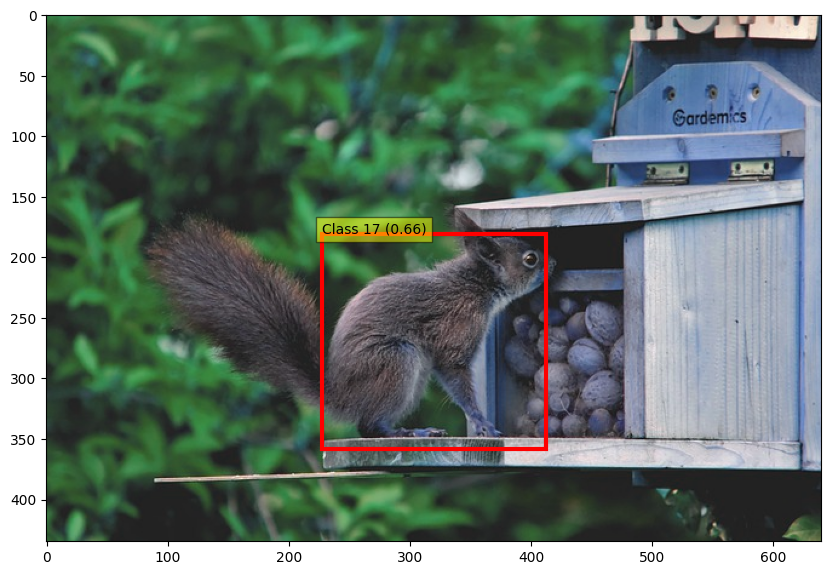

In [16]:
image_path = '/content/images/1.jpg'
image_np = load_image_into_numpy_array(image_path)
output_dict = run_inference_for_single_image(detection_model, image_np)

# Visualization
boxes = output_dict['detection_boxes']
class_ids = output_dict['detection_classes']
scores = output_dict['detection_scores']

visualize_boxes(image_np, boxes[0], class_ids[0], scores[0])
